<a href="https://colab.research.google.com/github/sobil-dalal/Object-Detection-and-Segmentation/blob/master/TrainCoCo_MaskRCNN_ResNet101_Pre_PascalWeights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clone the git repository and change the path and install the dependencies

In [1]:
# clone the repository
!git clone https://github.com/matterport/Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 40.54 MiB/s, done.
Resolving deltas: 100% (560/560), done.


### Update the requirement files - Tensorflow and keras version ==> ">=" to "=" to avoid versioning issue.

In [2]:
%%shell
cd Mask_RCNN
python setup.py install

running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mrcnn
copying mrcnn/config.py -> build/lib/mrcnn
copying mrcnn/visualize.py -> build/lib/mrcnn
copying mrcnn/utils.py -> build/lib/mrcnn
copying mrcnn/parallel_model.py -> build/lib/mrcnn
copying mrcnn/model.py -> build/lib/mrcnn
copying mrcnn/__init__.py -> build/lib/mrcnn
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/config.py -> build/bdist.linux-x86_64/egg/mrcn

## If fail to load requirement.txt file --> then only run the install tensorflow and keras installation steps and restart runtime if version change doesn't reflect

In [3]:
!pip install keras==2.0.8

     |████████████████████████████████| 276kB 6.8MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.8 which is incompatible.
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [4]:
!pip install tensorflow-gpu==1.15

     |████████████████████████████████| 411.5MB 42kB/s 
     |████████████████████████████████| 3.8MB 58.7MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 512kB 53.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=91003849a9e55ecab530b47332c230baeeceae456c6f873e57ff7649f9669b39
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing i

## Checking version of keras and tensorflow

In [5]:
import tensorflow as tf
import keras as kr
print(tf.__version__)
print(kr.__version__)

Using TensorFlow backend.


1.15.0
2.0.8


In [6]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


## Restarting the runtime

In [ ]:
#import os
#os.kill(os.getpid(), 9)

In [ ]:
#import tensorflow as tf
#import keras as kr
#print(tf.__version__)
#print(kr.__version__)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
os.chdir("/content/Mask_RCNN/samples")

In [2]:
os.chdir("/content/Mask_RCNN/samples/coco")

## Import the libraries

Below code is based on the offical Matterplot implementation - https://github.com/matterport/Mask_RCNN

## Imported the custom made pascalVOC package and initialise the variables

In [3]:
import coco
config = coco.CocoConfig()
COCO_DIR = os.getcwd()

Using TensorFlow backend.


In [4]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon
# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

%matplotlib inline

## Loading the validation dataset and checking the number of classes added using class_info function

In [5]:
dataset = coco.CocoDataset()
dataset.load_coco(COCO_DIR, "train", auto_download = True)

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Will use images in /content/Mask_RCNN/samples/coco/train2014
Will use annotations in /content/Mask_RCNN/samples/coco/annotations/instances_train2014.json
loading annotations into memory...
Done (t=9.70s)
creating index...
index created!
Image Count: 82081
Class Count: 81
  0. BG                                                
  1. person                                            
  2. bicycle                                           
  3. car                                               
  4. motorcycle                                        
  5. airplane                                          
  6. bus                                               
  7. train                                             
  8. truck                                             
  9. boat                                              
 10. traffic light                                     
 11. fire hydrant                                      
 12. stop sign                                         


## Mask R-CNN - Training Model

In [6]:
os.getcwd()

'/content/Mask_RCNN/samples/coco'

In [14]:
!cp '/content/drive/My Drive/Thesis_Colab/preActivatedModel_v4.py' '/content/Mask_RCNN/samples/coco/preActivatedModel.py'

In [8]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
#import mrcnn.model as modellib
import preActivatedModel as modellib
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Path to Shapes trained weights
SHAPES_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_shapes.h5")

In [9]:
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

Device to load the neural network on.
Useful if you're training a model on the same machine, in which case use CPU and leave the GPU for training.

In [10]:
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "training"

Method used to plot suboplot using matplotlib library

In [11]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Training and Validation Dataset

In [12]:
# Training dataset
dataset_train = coco.CocoDataset()
dataset_train.load_coco(COCO_DIR, "train", auto_download=True)
dataset_train.prepare()

# Validation dataset
dataset_val = coco.CocoDataset()
dataset_val.load_coco(COCO_DIR, "val", auto_download=True)
dataset_val.prepare()

print("Images: {}\nClasses: {}".format(len(dataset_train.image_ids), dataset.class_names))

Will use images in /content/Mask_RCNN/samples/coco/train2014
Will use annotations in /content/Mask_RCNN/samples/coco/annotations/instances_train2014.json
loading annotations into memory...
Done (t=13.28s)
creating index...
index created!
... done downloading.
Unzipping /content/Mask_RCNN/samples/coco/val2014.zip
... done unzipping
Will use images in /content/Mask_RCNN/samples/coco/val2014
Will use annotations in /content/Mask_RCNN/samples/coco/annotations/instances_val2014.json
loading annotations into memory...
Done (t=12.02s)
creating index...
index created!
Images: 82081
Classes: ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 

## Loading the MobileNet Pascal weights trained dataset weights

In [13]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="training", model_dir=MODEL_DIR,
                              config=config)

weights_path = "/content/drive/MyDrive/Thesis_Colab/Weights/mask_rcnn_pascalvoc_24112020_0233_ResNet101_PreActivated.h5"

# uncomment to load the last model you trained
# weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True, exclude=[
            "mrcnn_class_logits", "mrcnn_bbox_fc",
            "mrcnn_bbox", "mrcnn_mask"])






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
Loading weights  /content/drive/MyDrive/Thesis_Colab/Weights/mask_rcnn_pascalvoc_24112020_0233_ResNet101_PreActivated.h5







## Data Augmentation - Flips

In [14]:
# Image Augmentation
# Right/Left flip 50% of the time
import imgaug
augmentation = imgaug.augmenters.Fliplr(0.5)

## Train Model

In [15]:
import datetime
trainStartTime = datetime.datetime.now()

In [16]:
# Training - Stage 1
print("Training network heads")
model.train(dataset_train, dataset_val, learning_rate=config.LEARNING_RATE,
                    epochs=40,
                    layers='heads',
                    augmentation=augmentation)

Training network heads

Starting at epoch 0. LR=0.001

Checkpoint Path: /content/Mask_RCNN/logs/coco20201206T2136/mask_rcnn_coco_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistrib

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor





/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:1987: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/40
19/20 [===========================>..] - ETA: 2s - loss: 6.1560 - rpn_class_loss: 0.4445 - rpn_bbox_loss: 1.2648 - mrcnn_class_loss: 2.5428 - mrcnn_bbox_loss: 1.0477 - mrcnn_mask_loss: 0.8562

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2142: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'



20/20 [==============================] - 174s - loss: 6.0932 - rpn_class_loss: 0.4512 - rpn_bbox_loss: 1.3054 - mrcnn_class_loss: 2.4222 - mrcnn_bbox_loss: 1.0555 - mrcnn_mask_loss: 0.8588 - val_loss: 3.9636 - val_rpn_class_loss: 0.3461 - val_rpn_bbox_loss: 1.2140 - val_mrcnn_class_loss: 0.6538 - val_mrcnn_bbox_loss: 0.9140 - val_mrcnn_mask_loss: 0.8358
Epoch 2/40
20/20 [==============================] - 56s - loss: 3.6442 - rpn_class_loss: 0.2914 - rpn_bbox_loss: 1.1285 - mrcnn_class_loss: 0.5644 - mrcnn_bbox_loss: 0.8516 - mrcnn_mask_loss: 0.8083 - val_loss: 3.6617 - val_rpn_class_loss: 0.2892 - val_rpn_bbox_loss: 1.1530 - val_mrcnn_class_loss: 0.5789 - val_mrcnn_bbox_loss: 0.8526 - val_mrcnn_mask_loss: 0.7881
Epoch 3/40
20/20 [==============================] - 53s - loss: 3.5960 - rpn_class_loss: 0.3021 - rpn_bbox_loss: 1.0008 - mrcnn_class_loss: 0.7348 - mrcnn_bbox_loss: 0.7923 - mrcnn_mask_loss: 0.7661 - val_loss: 3.3670 - val_rpn_class_loss: 0.2454 - val_rpn_bbox_loss: 0.9690 - 

In [17]:
stage1_currentTime = datetime.datetime.now()

In [18]:
# Training - Stage 2
# Finetune layers from ResNet stage 4 and up
print("Fine tune Resnet stage 4 and up")
model.train(dataset_train, dataset_val,
                    learning_rate=config.LEARNING_RATE,
                    epochs=120,
                    layers='4+',
                    augmentation=augmentation)

Fine tune Resnet stage 4 and up

Starting at epoch 40. LR=0.001

Checkpoint Path: /content/Mask_RCNN/logs/coco20201206T2136/mask_rcnn_coco_{epoch:04d}.h5
Selecting layers to train
bn4a_branch2a          (BatchNorm)
res4a_branch2a         (Conv2D)
bn4a_branch2b          (BatchNorm)
res4a_branch2b         (Conv2D)
bn4a_branch2c          (BatchNorm)
res4a_branch2c         (Conv2D)
res4a_branch1          (Conv2D)
bn4b_branch2a          (BatchNorm)
res4b_branch2a         (Conv2D)
bn4b_branch2b          (BatchNorm)
res4b_branch2b         (Conv2D)
bn4b_branch2c          (BatchNorm)
res4b_branch2c         (Conv2D)
bn4c_branch2a          (BatchNorm)
res4c_branch2a         (Conv2D)
bn4c_branch2b          (BatchNorm)
res4c_branch2b         (Conv2D)
bn4c_branch2c          (BatchNorm)
res4c_branch2c         (Conv2D)
bn4d_branch2a          (BatchNorm)
res4d_branch2a         (Conv2D)
bn4d_branch2b          (BatchNorm)
res4d_branch2b         (Conv2D)
bn4d_branch2c          (BatchNorm)
res4d_branch2c  

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:1987: UserWarning: Using a generator with `use_multiprocessi

Epoch 41/120
19/20 [===========================>..] - ETA: 4s - loss: 3.2510 - rpn_class_loss: 0.2307 - rpn_bbox_loss: 1.0777 - mrcnn_class_loss: 0.6206 - mrcnn_bbox_loss: 0.6589 - mrcnn_mask_loss: 0.6631 

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2142: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


20/20 [==============================] - 145s - loss: 3.2589 - rpn_class_loss: 0.2276 - rpn_bbox_loss: 1.0991 - mrcnn_class_loss: 0.6073 - mrcnn_bbox_loss: 0.6581 - mrcnn_mask_loss: 0.6669 - val_loss: 3.5748 - val_rpn_class_loss: 0.3085 - val_rpn_bbox_loss: 1.2818 - val_mrcnn_class_loss: 0.6915 - val_mrcnn_bbox_loss: 0.6516 - val_mrcnn_mask_loss: 0.6414
Epoch 42/120
20/20 [==============================] - 57s - loss: 2.9475 - rpn_class_loss: 0.2292 - rpn_bbox_loss: 0.8475 - mrcnn_class_loss: 0.5524 - mrcnn_bbox_loss: 0.6734 - mrcnn_mask_loss: 0.6450 - val_loss: 3.1399 - val_rpn_class_loss: 0.2293 - val_rpn_bbox_loss: 0.8822 - val_mrcnn_class_loss: 0.7024 - val_mrcnn_bbox_loss: 0.6679 - val_mrcnn_mask_loss: 0.6580
Epoch 43/120
20/20 [==============================] - 54s - loss: 3.6194 - rpn_class_loss: 0.2856 - rpn_bbox_loss: 1.2856 - mrcnn_class_loss: 0.6826 - mrcnn_bbox_loss: 0.7106 - mrcnn_mask_loss: 0.6549 - val_loss: 3.0951 - val_rpn_class_loss: 0.2406 - val_rpn_bbox_loss: 0.8822

In [19]:
stage2_currentTime = datetime.datetime.now()

In [20]:
# Training - Stage 3.1
# Fine tune all layers
print("Fine tune all layers")
model.train(dataset_train, dataset_val,
                    learning_rate=config.LEARNING_RATE / 10,
                    epochs=160,
                    layers='all',
                    augmentation=augmentation)

Fine tune all layers

Starting at epoch 120. LR=0.0001

Checkpoint Path: /content/Mask_RCNN/logs/coco20201206T2136/mask_rcnn_coco_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
bn2a_branch2a          (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2c          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2c          (BatchNorm)
res2c_branch2c         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2b          (BatchNorm)
res3a_branch2b         (C

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:1987: UserWarning: Using a generator with `use_multiprocessi

Epoch 121/160
19/20 [===========================>..] - ETA: 6s - loss: 2.8479 - rpn_class_loss: 0.2051 - rpn_bbox_loss: 0.8697 - mrcnn_class_loss: 0.5645 - mrcnn_bbox_loss: 0.6076 - mrcnn_mask_loss: 0.6009 

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2142: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


20/20 [==============================] - 154s - loss: 2.8579 - rpn_class_loss: 0.1982 - rpn_bbox_loss: 0.8592 - mrcnn_class_loss: 0.5875 - mrcnn_bbox_loss: 0.6077 - mrcnn_mask_loss: 0.6052 - val_loss: 2.7501 - val_rpn_class_loss: 0.1816 - val_rpn_bbox_loss: 0.7816 - val_mrcnn_class_loss: 0.5353 - val_mrcnn_bbox_loss: 0.6380 - val_mrcnn_mask_loss: 0.6135
Epoch 122/160
20/20 [==============================] - 56s - loss: 3.0077 - rpn_class_loss: 0.2044 - rpn_bbox_loss: 0.9292 - mrcnn_class_loss: 0.6340 - mrcnn_bbox_loss: 0.6294 - mrcnn_mask_loss: 0.6106 - val_loss: 2.9069 - val_rpn_class_loss: 0.1882 - val_rpn_bbox_loss: 0.8357 - val_mrcnn_class_loss: 0.6390 - val_mrcnn_bbox_loss: 0.6285 - val_mrcnn_mask_loss: 0.6155
Epoch 123/160
20/20 [==============================] - 57s - loss: 2.9188 - rpn_class_loss: 0.2326 - rpn_bbox_loss: 0.9133 - mrcnn_class_loss: 0.5757 - mrcnn_bbox_loss: 0.5830 - mrcnn_mask_loss: 0.6142 - val_loss: 2.9134 - val_rpn_class_loss: 0.2115 - val_rpn_bbox_loss: 0.90

In [21]:
stage3i_currentTime = datetime.datetime.now()

In [22]:
# Training - Stage 3.2
# Fine tune all layers
print("Fine tune all layers")
model.train(dataset_train, dataset_val,
                    learning_rate=config.LEARNING_RATE / 50,
                    epochs=200,
                    layers='all',
                    augmentation=augmentation)

Fine tune all layers

Starting at epoch 160. LR=2e-05

Checkpoint Path: /content/Mask_RCNN/logs/coco20201206T2136/mask_rcnn_coco_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
bn2a_branch2a          (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2c          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2c          (BatchNorm)
res2c_branch2c         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2b          (BatchNorm)
res3a_branch2b         (Co

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:1987: UserWarning: Using a generator with `use_multiprocessi

Epoch 161/200
19/20 [===========================>..] - ETA: 5s - loss: 2.8198 - rpn_class_loss: 0.2134 - rpn_bbox_loss: 0.9295 - mrcnn_class_loss: 0.5083 - mrcnn_bbox_loss: 0.5747 - mrcnn_mask_loss: 0.5939 

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2142: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


20/20 [==============================] - 155s - loss: 2.7989 - rpn_class_loss: 0.2072 - rpn_bbox_loss: 0.9180 - mrcnn_class_loss: 0.4959 - mrcnn_bbox_loss: 0.5817 - mrcnn_mask_loss: 0.5960 - val_loss: 2.9346 - val_rpn_class_loss: 0.1978 - val_rpn_bbox_loss: 0.8280 - val_mrcnn_class_loss: 0.6806 - val_mrcnn_bbox_loss: 0.6085 - val_mrcnn_mask_loss: 0.6196
Epoch 162/200
20/20 [==============================] - 58s - loss: 2.8430 - rpn_class_loss: 0.1463 - rpn_bbox_loss: 0.7924 - mrcnn_class_loss: 0.6620 - mrcnn_bbox_loss: 0.5972 - mrcnn_mask_loss: 0.6450 - val_loss: 2.7763 - val_rpn_class_loss: 0.1764 - val_rpn_bbox_loss: 0.7575 - val_mrcnn_class_loss: 0.6240 - val_mrcnn_bbox_loss: 0.6149 - val_mrcnn_mask_loss: 0.6035
Epoch 163/200
20/20 [==============================] - 61s - loss: 3.0122 - rpn_class_loss: 0.2032 - rpn_bbox_loss: 0.9240 - mrcnn_class_loss: 0.6684 - mrcnn_bbox_loss: 0.6106 - mrcnn_mask_loss: 0.6061 - val_loss: 2.9506 - val_rpn_class_loss: 0.2255 - val_rpn_bbox_loss: 0.88

In [23]:
stage3ii_currentTime = datetime.datetime.now()

In [24]:
trainEndTime = datetime.datetime.now()

##Total training Time and time distribution

In [25]:
stage1_Time = stage1_currentTime - trainStartTime
stage2_Time = stage2_currentTime - stage1_currentTime
stage3i_Time = stage3i_currentTime - stage2_currentTime
stage3ii_Time = stage3ii_currentTime - stage3i_currentTime
totalTime = trainEndTime - trainStartTime

In [27]:
print(f"Stage 1 time = {stage1_Time}")
print(f"Stage 2 time = {stage2_Time}")
print(f"Stage 3.1 time = {stage3i_Time}")
print(f"Stage 3.2 time = {stage3ii_Time}")
print(f"Total time = {totalTime}")

Stage 1 time = 0:38:59.033504
Stage 2 time = 1:17:28.872974
Stage 3.1 time = 0:40:57.845866
Stage 3.2 time = 0:42:10.171340
Total time = 3:19:36.761767


## Save Weights to googleDrive

In [28]:
!cp "/content/Mask_RCNN/logs/coco20201206T2136/mask_rcnn_coco_0153.h5" "/content/drive/My Drive/Thesis_Colab/Weights/mask_rcnn_pascalvoc_07122020_0141_ResNet101_pre.h5"

## Run Detection

### Overiding few configuration with inference configuration

In [ ]:
# Override the training configurations with a few
# changes for inferencing.
class PascalVocInferenceConfig(pascalVOC.PascalVocConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
config = PascalVocInferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.5
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                33
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [ ]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

weights_path = "/content/drive/MyDrive/Thesis_Colab/Weights/mask_rcnn_pascalvoc_24112020_0651_ResNet101.h5"

# uncomment to load the last model you trained
# weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  /content/drive/MyDrive/Thesis_Colab/Weights/mask_rcnn_pascalvoc_24112020_0651_ResNet101.h5


image ID: pascalVoc.2009_004738.jpg (859) /content/Mask_RCNN/samples/PascalVOC/VOC2012/JPEGImages/2009_004738.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 33)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (2,)                  min:   14.00000  max:   15.00000  int64
gt_bbox                  shape: (2, 4)                min:  228.00000  max: 1004.00000  int32
gt_mask                  shape: (1024, 1024, 2)       min:    0.00000  max:    1.00000  bool


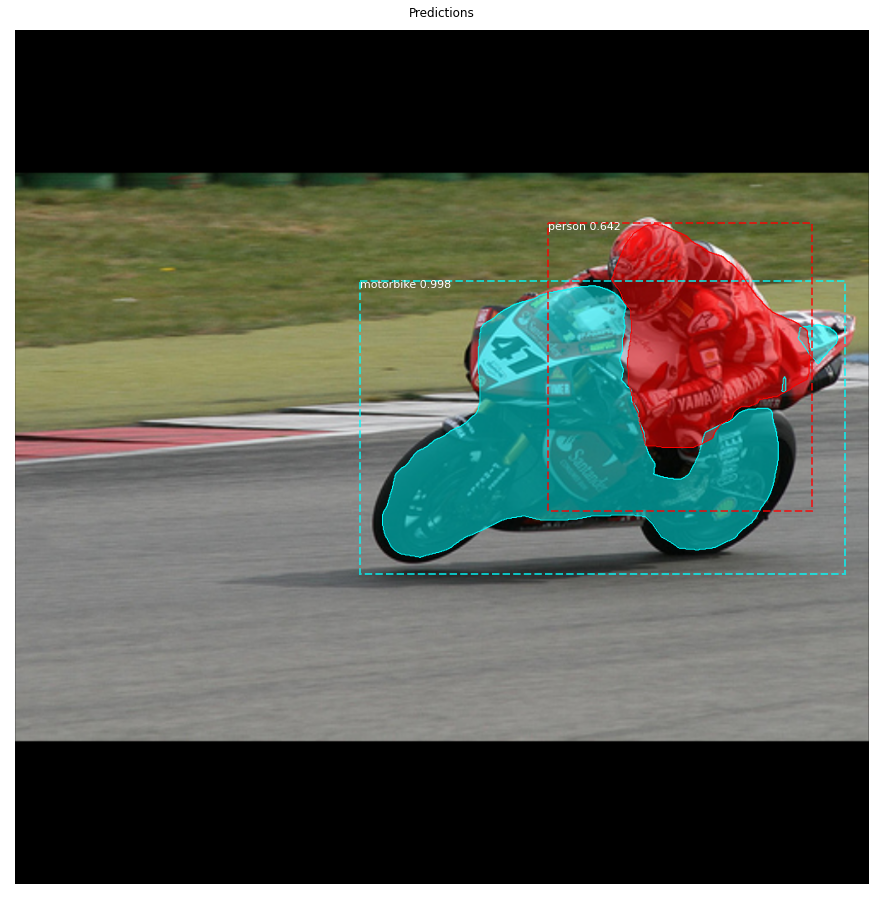

In [ ]:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))
# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

## Precision-Recall

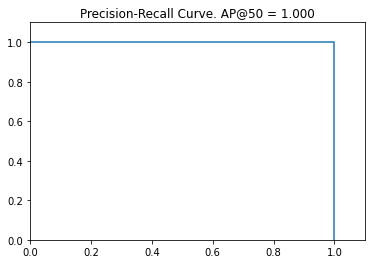

In [ ]:
# Draw precision-recall curve
AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                          r['rois'], r['class_ids'], r['scores'], r['masks'])
visualize.plot_precision_recall(AP, precisions, recalls)

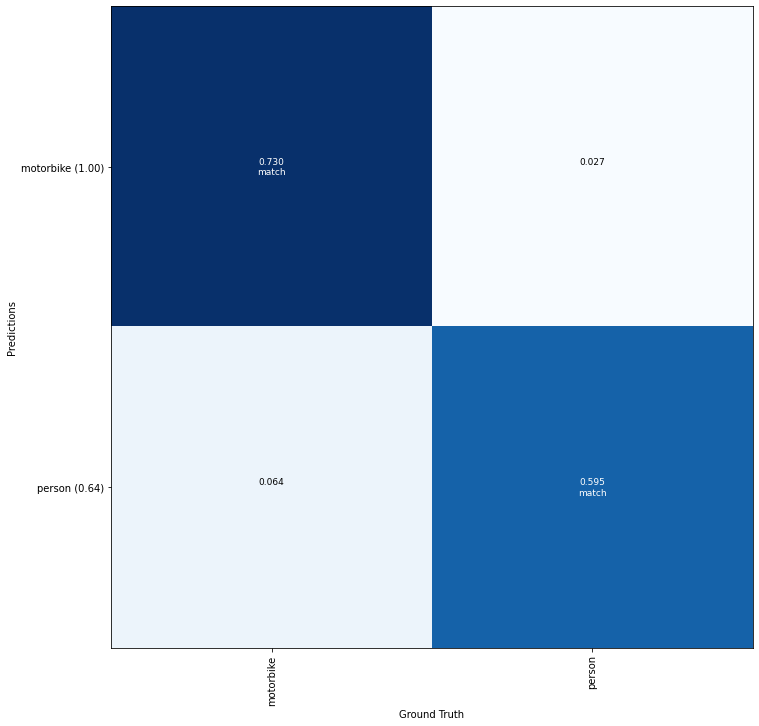

In [ ]:
# Grid of ground truth objects and their predictions
visualize.plot_overlaps(gt_class_id, r['class_ids'], r['scores'],
                        overlaps, dataset.class_names)

## Compute mAP @ IoU=50 on Batch of Images

In [ ]:
# Compute VOC-style Average Precision
def compute_batch_ap(image_ids):
    APs = []
    for image_id in image_ids:
        # Load image
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(dataset, config,
                                   image_id, use_mini_mask=False)
        # Run object detection
        results = model.detect([image], verbose=0)
        # Compute AP
        r = results[0]
        AP, precisions, recalls, overlaps =\
            utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                              r['rois'], r['class_ids'], r['scores'], r['masks'])
        APs.append(AP)
    return APs

# Pick a set of random images
image_ids = np.random.choice(dataset.image_ids, 10)
APs = compute_batch_ap(image_ids)
print("mAP @ IoU=50: ", np.mean(APs))

mAP @ IoU=50:  0.6547619074583053


# Step by Step Prediction

## Stage 1: Region Proposal Network

The Region Proposal Network (RPN) runs a lightweight binary classifier on a lot of boxes (anchors) over the image and returns object/no-object scores. Anchors with high objectness score (positive anchors) are passed to the stage two to be classified.

Often, even positive anchors don't cover objects fully. So the RPN also regresses a refinement (a delta in location and size) to be applied to the anchors to shift it and resize it a bit to the correct boundaries of the object.

### 1.a RPN Targets

The RPN targets are the training values for the RPN. To generate the targets, we start with a grid of anchors that cover the full image at different scales, and then we compute the IoU of the anchors with ground truth object. Positive anchors are those that have an IoU >= 0.7 with any ground truth object, and negative anchors are those that don't cover any object by more than 0.3 IoU. Anchors in between (i.e. cover an object by IoU >= 0.3 but < 0.7) are considered neutral and excluded from training.

To train the RPN regressor, we also compute the shift and resizing needed to make the anchor cover the ground truth object completely.

In [ ]:
# Generate RPN trainig targets
# target_rpn_match is 1 for positive anchors, -1 for negative anchors
# and 0 for neutral anchors.
target_rpn_match, target_rpn_bbox = modellib.build_rpn_targets(
    image.shape, model.anchors, gt_class_id, gt_bbox, model.config)
log("target_rpn_match", target_rpn_match)
log("target_rpn_bbox", target_rpn_bbox)

positive_anchor_ix = np.where(target_rpn_match[:] == 1)[0]
negative_anchor_ix = np.where(target_rpn_match[:] == -1)[0]
neutral_anchor_ix = np.where(target_rpn_match[:] == 0)[0]
positive_anchors = model.anchors[positive_anchor_ix]
negative_anchors = model.anchors[negative_anchor_ix]
neutral_anchors = model.anchors[neutral_anchor_ix]
log("positive_anchors", positive_anchors)
log("negative_anchors", negative_anchors)
log("neutral anchors", neutral_anchors)

# Apply refinement deltas to positive anchors
refined_anchors = utils.apply_box_deltas(
    positive_anchors,
    target_rpn_bbox[:positive_anchors.shape[0]] * model.config.RPN_BBOX_STD_DEV)
log("refined_anchors", refined_anchors, )

target_rpn_match         shape: (261888,)             min:   -1.00000  max:    1.00000  int32
target_rpn_bbox          shape: (256, 4)              min:   -1.17880  max:    1.35967  float64
positive_anchors         shape: (4, 4)                min:  256.00000  max: 1130.03867  float64
negative_anchors         shape: (252, 4)              min:  -45.25483  max: 1072.00000  float64
neutral anchors          shape: (261632, 4)           min: -362.03867  max: 1322.03867  float64
refined_anchors          shape: (4, 4)                min:  228.00000  max: 1004.00000  float32


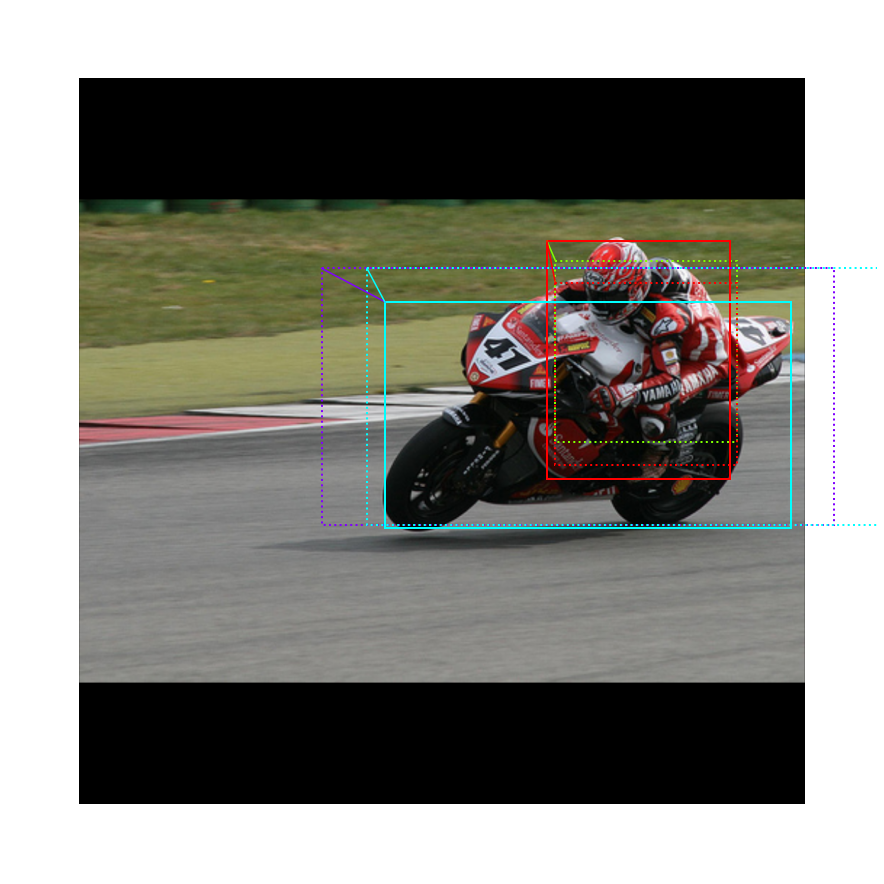

In [ ]:
# Display positive anchors before refinement (dotted) and
# after refinement (solid).
visualize.draw_boxes(image, boxes=positive_anchors, refined_boxes=refined_anchors, ax=get_ax())

### 1.b RPN Predictions
Here we run the RPN graph and display its predictions.

In [ ]:
# Run RPN sub-graph
pillar = model.keras_model.get_layer("ROI").output  # node to start searching from

# TF 1.4 and 1.9 introduce new versions of NMS. Search for all names to support TF 1.3~1.10
nms_node = model.ancestor(pillar, "ROI/rpn_non_max_suppression:0")
if nms_node is None:
    nms_node = model.ancestor(pillar, "ROI/rpn_non_max_suppression/NonMaxSuppressionV2:0")
if nms_node is None: #TF 1.9-1.10
    nms_node = model.ancestor(pillar, "ROI/rpn_non_max_suppression/NonMaxSuppressionV3:0")

rpn = model.run_graph([image], [
    ("rpn_class", model.keras_model.get_layer("rpn_class").output),
    ("pre_nms_anchors", model.ancestor(pillar, "ROI/pre_nms_anchors:0")),
    ("refined_anchors", model.ancestor(pillar, "ROI/refined_anchors:0")),
    ("refined_anchors_clipped", model.ancestor(pillar, "ROI/refined_anchors_clipped:0")),
    ("post_nms_anchor_ix", nms_node),
    ("proposals", model.keras_model.get_layer("ROI").output),
])

rpn_class                shape: (1, 261888, 2)        min:    0.00000  max:    1.00000  float32
pre_nms_anchors          shape: (1, 6000, 4)          min:   -0.35390  max:    1.29134  float32
refined_anchors          shape: (1, 6000, 4)          min: -819.17664  max:  820.55994  float32
refined_anchors_clipped  shape: (1, 6000, 4)          min:    0.00000  max:    1.00000  float32
post_nms_anchor_ix       shape: (954,)                min:    0.00000  max: 5991.00000  int32
proposals                shape: (1, 1000, 4)          min:    0.00000  max:    1.00000  float32


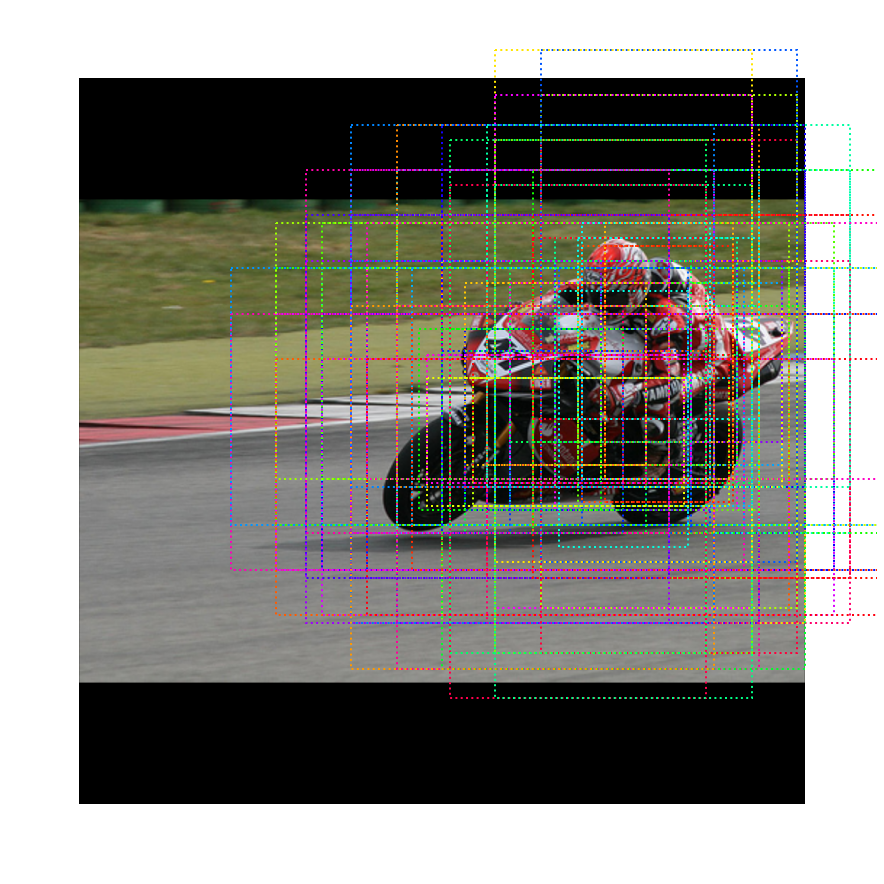

In [ ]:
# Show top anchors by score (before refinement)
limit = 100
sorted_anchor_ids = np.argsort(rpn['rpn_class'][:,:,1].flatten())[::-1]
visualize.draw_boxes(image, boxes=model.anchors[sorted_anchor_ids[:limit]], ax=get_ax())

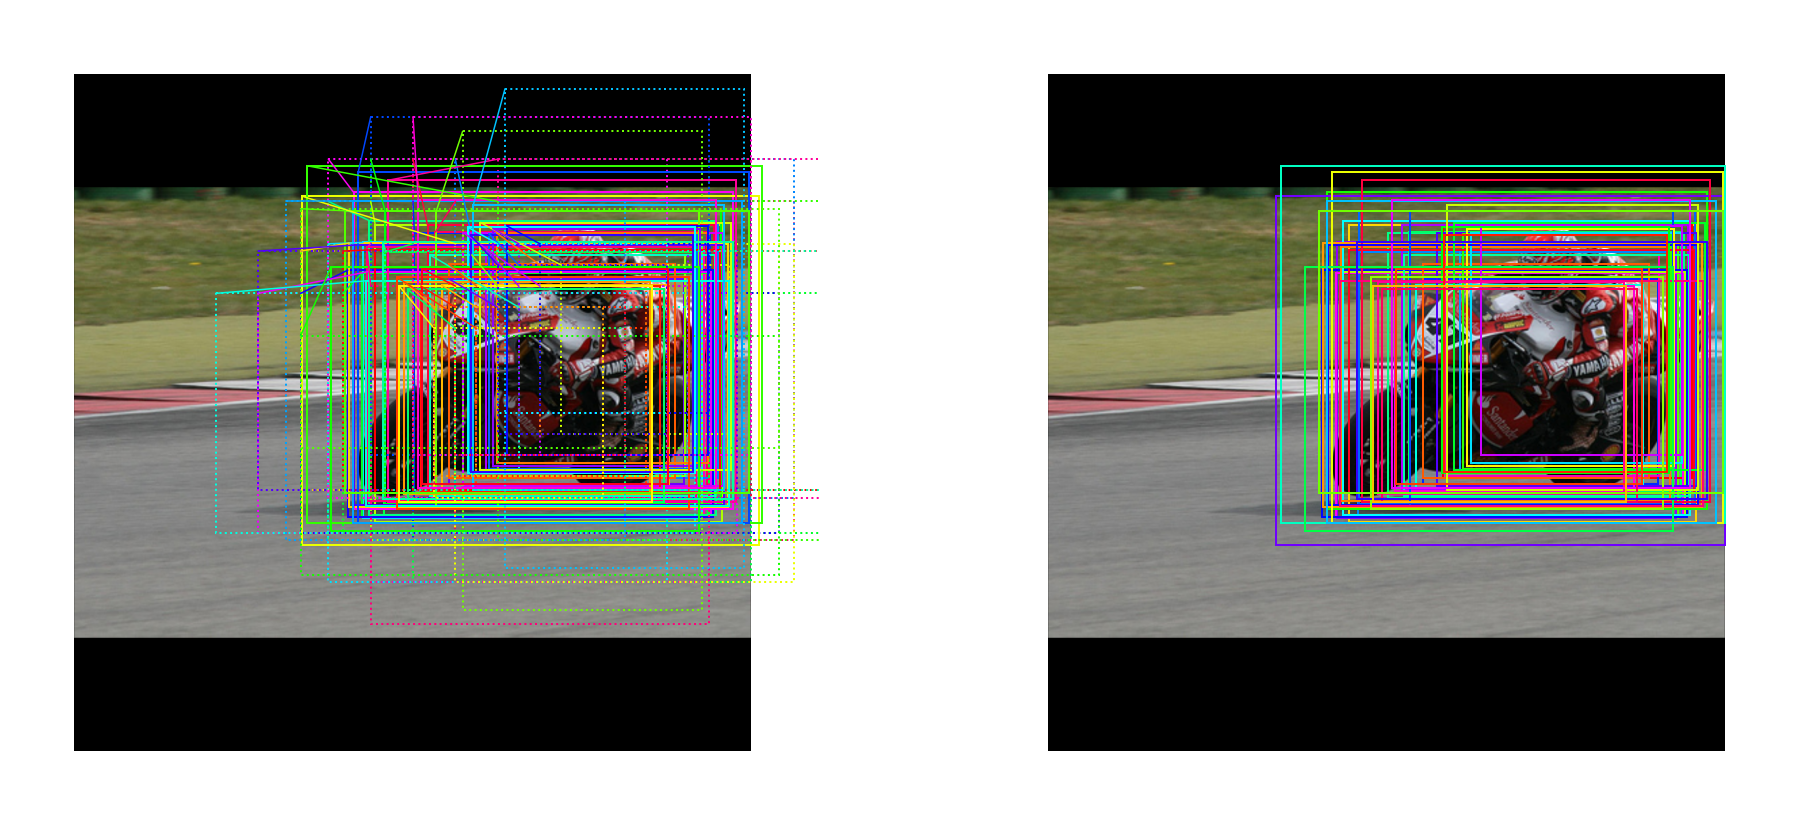

In [ ]:
# Show top anchors with refinement. Then with clipping to image boundaries
limit = 50
ax = get_ax(1, 2)
pre_nms_anchors = utils.denorm_boxes(rpn["pre_nms_anchors"][0], image.shape[:2])
refined_anchors = utils.denorm_boxes(rpn["refined_anchors"][0], image.shape[:2])
refined_anchors_clipped = utils.denorm_boxes(rpn["refined_anchors_clipped"][0], image.shape[:2])
visualize.draw_boxes(image, boxes=pre_nms_anchors[:limit],
                     refined_boxes=refined_anchors[:limit], ax=ax[0])
visualize.draw_boxes(image, refined_boxes=refined_anchors_clipped[:limit], ax=ax[1])

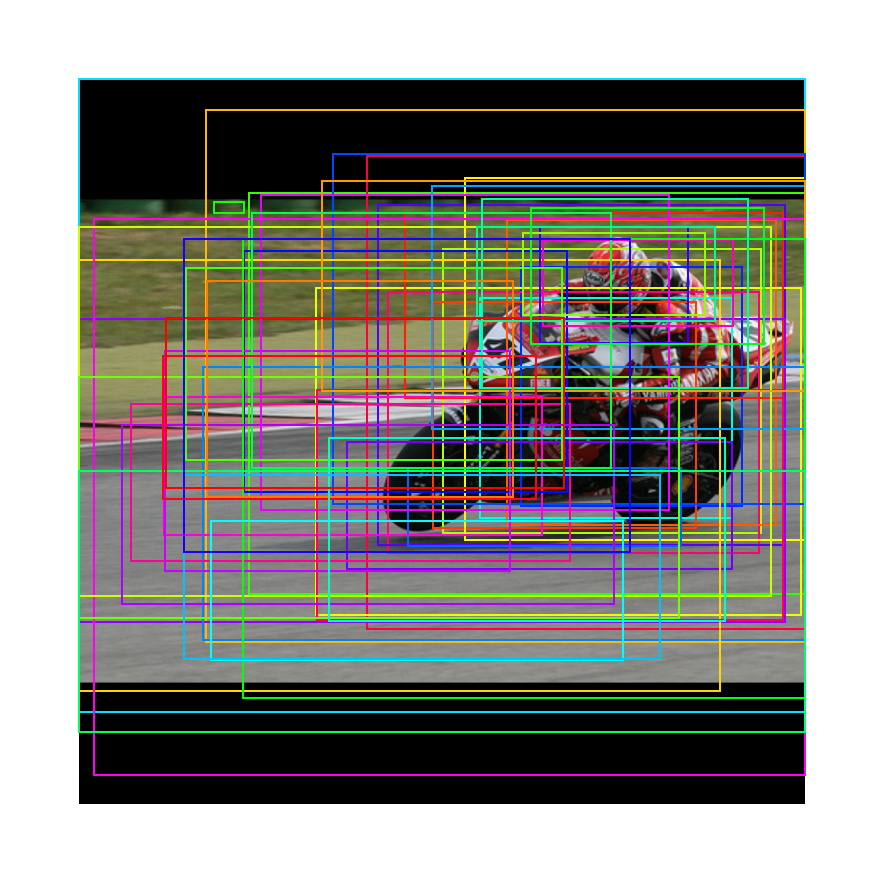

In [ ]:
# Show refined anchors after non-max suppression
limit = 50
ixs = rpn["post_nms_anchor_ix"][:limit]
visualize.draw_boxes(image, refined_boxes=refined_anchors_clipped[ixs], ax=get_ax())

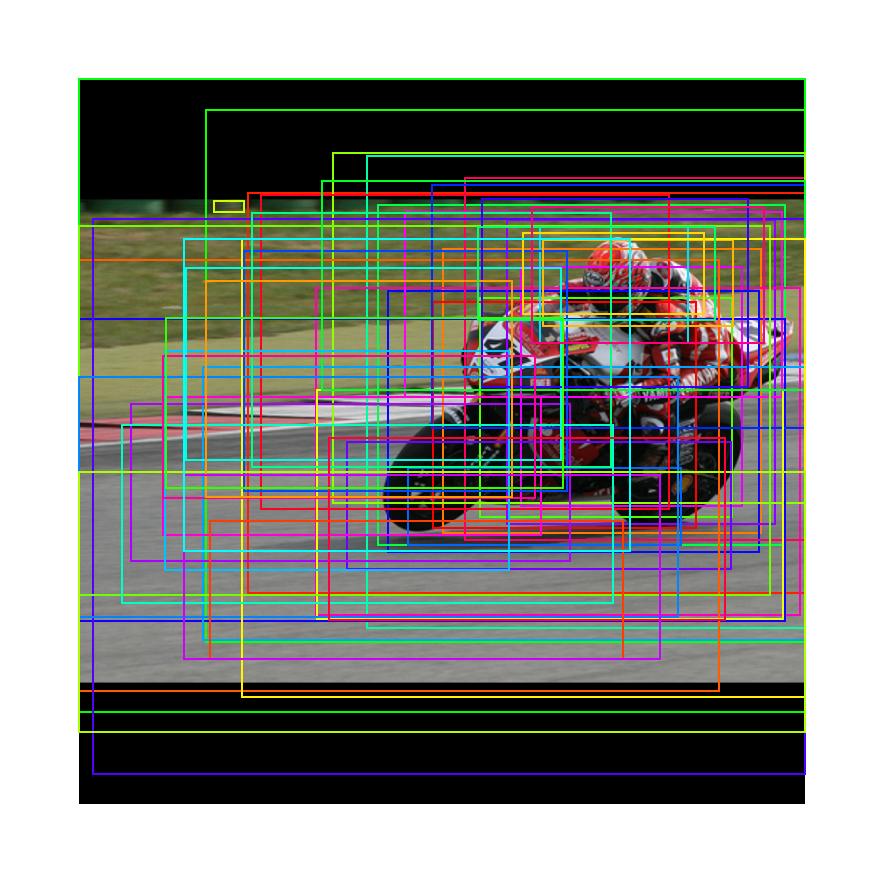

In [ ]:
# Show final proposals
# These are the same as the previous step (refined anchors 
# after NMS) but with coordinates normalized to [0, 1] range.
limit = 50
# Convert back to image coordinates for display
h, w = config.IMAGE_SHAPE[:2]
proposals = rpn['proposals'][0, :limit] * np.array([h, w, h, w])
visualize.draw_boxes(image, refined_boxes=proposals, ax=get_ax())

In [ ]:
# Measure the RPN recall (percent of objects covered by anchors)
# Here we measure recall for 3 different methods:
# - All anchors
# - All refined anchors
# - Refined anchors after NMS
iou_threshold = 0.7

recall, positive_anchor_ids = utils.compute_recall(model.anchors, gt_bbox, iou_threshold)
print("All Anchors ({:5})       Recall: {:.3f}  Positive anchors: {}".format(
    model.anchors.shape[0], recall, len(positive_anchor_ids)))

recall, positive_anchor_ids = utils.compute_recall(rpn['refined_anchors'][0], gt_bbox, iou_threshold)
print("Refined Anchors ({:5})   Recall: {:.3f}  Positive anchors: {}".format(
    rpn['refined_anchors'].shape[1], recall, len(positive_anchor_ids)))

recall, positive_anchor_ids = utils.compute_recall(proposals, gt_bbox, iou_threshold)
print("Post NMS Anchors ({:5})  Recall: {:.3f}  Positive anchors: {}".format(
    proposals.shape[0], recall, len(positive_anchor_ids)))

All Anchors (261888)       Recall: 0.500  Positive anchors: 2
Refined Anchors ( 6000)   Recall: 0.000  Positive anchors: 0
Post NMS Anchors (   50)  Recall: 0.500  Positive anchors: 1


## Stage 2: Proposal Classification
This stage takes the region proposals from the RPN and classifies them.
### 2.a Proposal Classification
Run the classifier heads on proposals to generate class propbabilities and bounding box regressions.

In [ ]:
# Get input and output to classifier and mask heads.
mrcnn = model.run_graph([image], [
    ("proposals", model.keras_model.get_layer("ROI").output),
    ("probs", model.keras_model.get_layer("mrcnn_class").output),
    ("deltas", model.keras_model.get_layer("mrcnn_bbox").output),
    ("masks", model.keras_model.get_layer("mrcnn_mask").output),
    ("detections", model.keras_model.get_layer("mrcnn_detection").output),
])

proposals                shape: (1, 1000, 4)          min:    0.00000  max:    1.00000  float32
probs                    shape: (1, 1000, 21)         min:    0.00000  max:    1.00000  float32
deltas                   shape: (1, 1000, 21, 4)      min:   -4.61136  max:    5.84921  float32
masks                    shape: (1, 100, 28, 28, 21)  min:    0.00000  max:    0.99995  float32
detections               shape: (1, 100, 6)           min:    0.00000  max:   15.00000  float32


2 detections: ['motorbike' 'person']


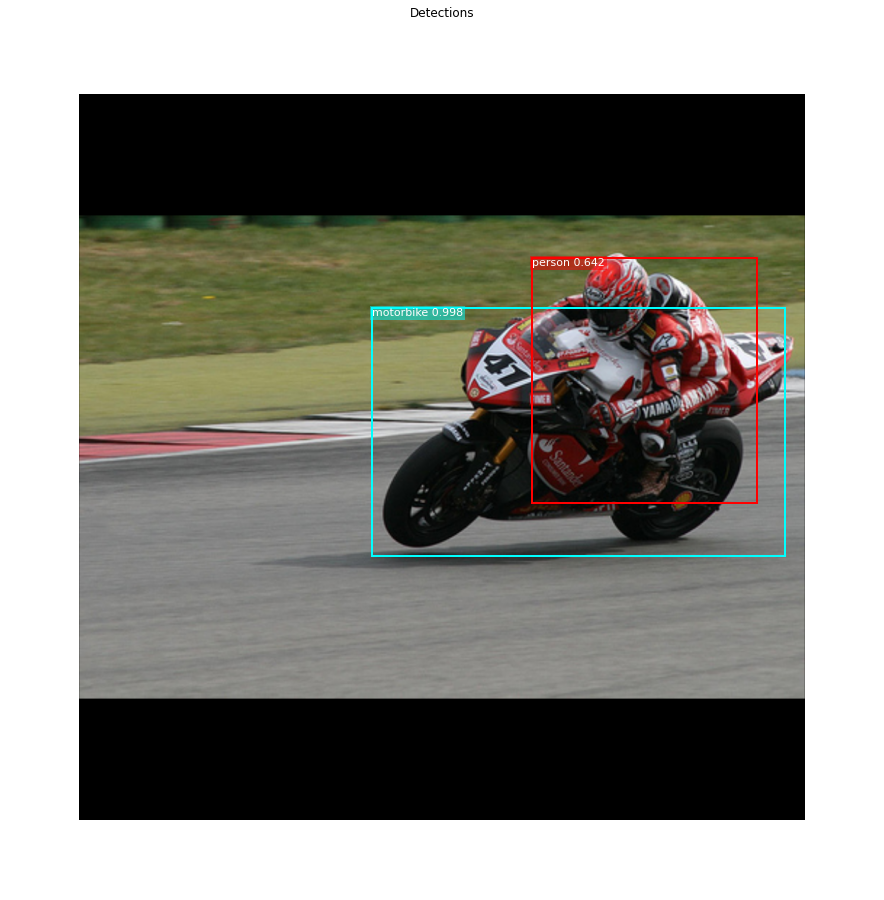

In [ ]:
# Get detection class IDs. Trim zero padding.
det_class_ids = mrcnn['detections'][0, :, 4].astype(np.int32)
det_count = np.where(det_class_ids == 0)[0][0]
det_class_ids = det_class_ids[:det_count]
detections = mrcnn['detections'][0, :det_count]

print("{} detections: {}".format(
    det_count, np.array(dataset.class_names)[det_class_ids]))

captions = ["{} {:.3f}".format(dataset.class_names[int(c)], s) if c > 0 else ""
            for c, s in zip(detections[:, 4], detections[:, 5])]
visualize.draw_boxes(
    image, 
    refined_boxes=utils.denorm_boxes(detections[:, :4], image.shape[:2]),
    visibilities=[2] * len(detections),
    captions=captions, title="Detections",
    ax=get_ax())

### 2.c Step by Step Detection
Here we dive deeper into the process of processing the detections.

In [ ]:
# Proposals are in normalized coordinates. Scale them
# to image coordinates.
h, w = config.IMAGE_SHAPE[:2]
proposals = np.around(mrcnn["proposals"][0] * np.array([h, w, h, w])).astype(np.int32)

# Class ID, score, and mask per proposal
roi_class_ids = np.argmax(mrcnn["probs"][0], axis=1)
roi_scores = mrcnn["probs"][0, np.arange(roi_class_ids.shape[0]), roi_class_ids]
roi_class_names = np.array(dataset.class_names)[roi_class_ids]
roi_positive_ixs = np.where(roi_class_ids > 0)[0]

# How many ROIs vs empty rows?
print("{} Valid proposals out of {}".format(np.sum(np.any(proposals, axis=1)), proposals.shape[0]))
print("{} Positive ROIs".format(len(roi_positive_ixs)))

# Class counts
print(list(zip(*np.unique(roi_class_names, return_counts=True))))

954 Valid proposals out of 1000
22 Positive ROIs
[('BG', 978), ('motorbike', 18), ('person', 4)]


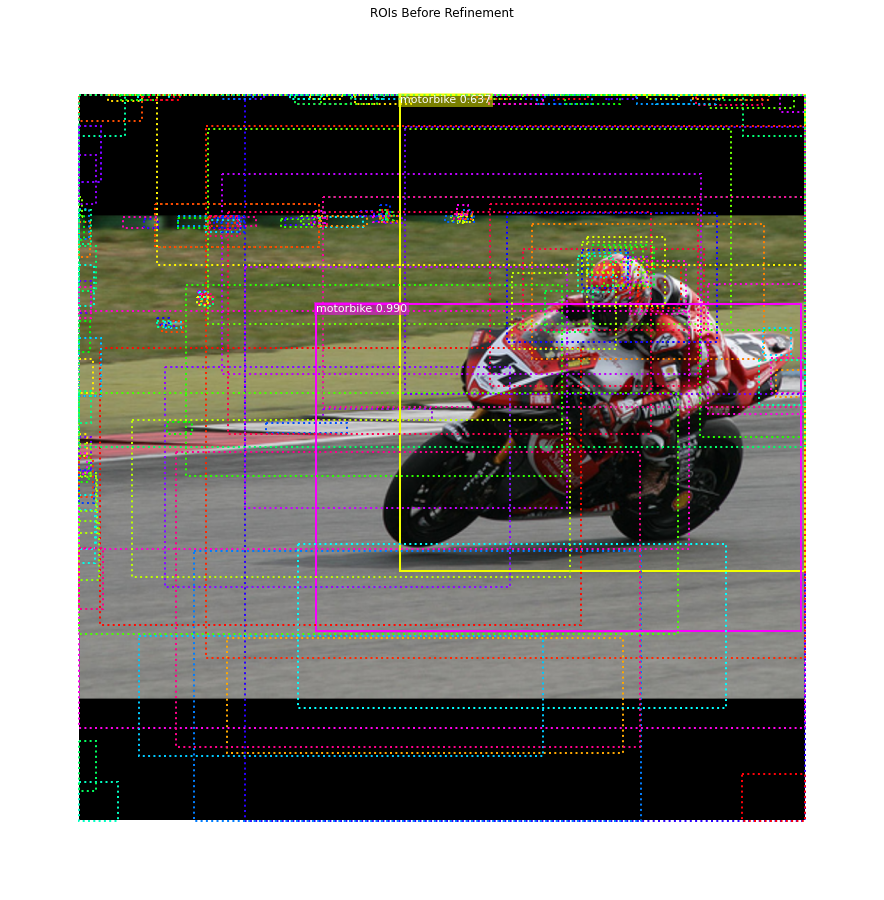

In [ ]:
# Display a random sample of proposals.
# Proposals classified as background are dotted, and
# the rest show their class and confidence score.
limit = 200
ixs = np.random.randint(0, proposals.shape[0], limit)
captions = ["{} {:.3f}".format(dataset.class_names[c], s) if c > 0 else ""
            for c, s in zip(roi_class_ids[ixs], roi_scores[ixs])]
visualize.draw_boxes(image, boxes=proposals[ixs],
                     visibilities=np.where(roi_class_ids[ixs] > 0, 2, 1),
                     captions=captions, title="ROIs Before Refinement",
                     ax=get_ax())

### Apply Bounding Box Refinement

roi_bbox_specific        shape: (1000, 4)             min:   -3.37863  max:    4.97645  float32
refined_proposals        shape: (1000, 4)             min: -333.00000  max: 1635.00000  int32


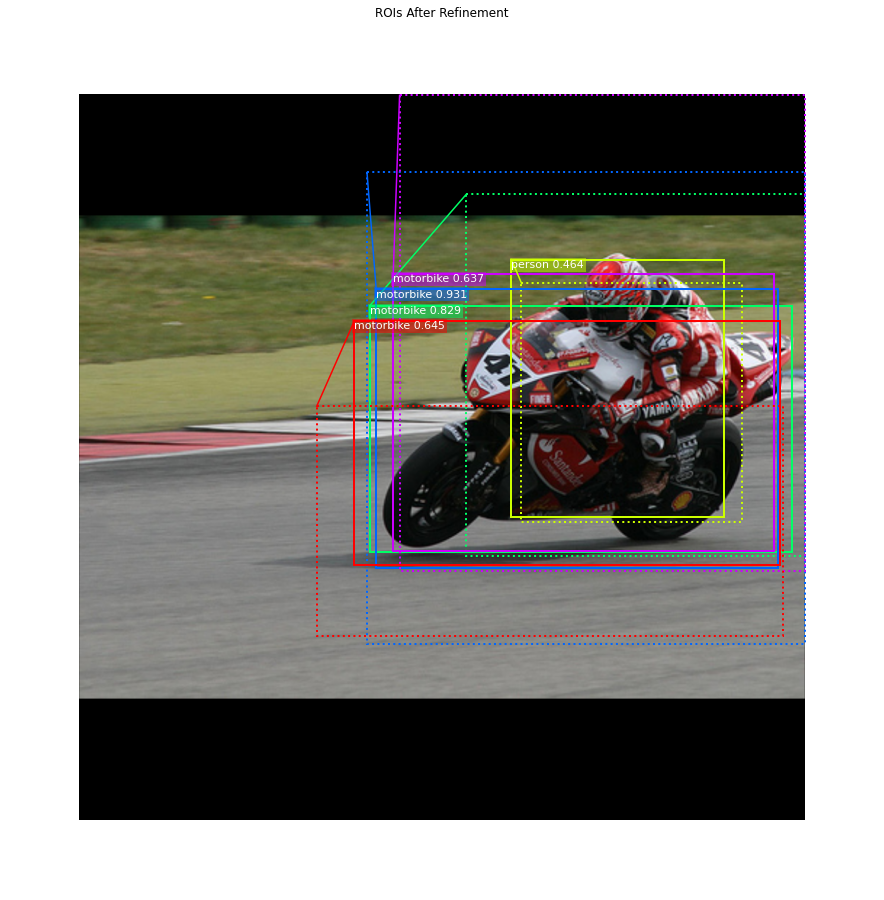

In [ ]:
# Class-specific bounding box shifts.
roi_bbox_specific = mrcnn["deltas"][0, np.arange(proposals.shape[0]), roi_class_ids]
log("roi_bbox_specific", roi_bbox_specific)

# Apply bounding box transformations
# Shape: [N, (y1, x1, y2, x2)]
refined_proposals = utils.apply_box_deltas(
    proposals, roi_bbox_specific * config.BBOX_STD_DEV).astype(np.int32)
log("refined_proposals", refined_proposals)

# Show positive proposals
# ids = np.arange(roi_boxes.shape[0])  # Display all
limit = 5
ids = np.random.randint(0, len(roi_positive_ixs), limit)  # Display random sample
captions = ["{} {:.3f}".format(dataset.class_names[c], s) if c > 0 else ""
            for c, s in zip(roi_class_ids[roi_positive_ixs][ids], roi_scores[roi_positive_ixs][ids])]
visualize.draw_boxes(image, boxes=proposals[roi_positive_ixs][ids],
                     refined_boxes=refined_proposals[roi_positive_ixs][ids],
                     visibilities=np.where(roi_class_ids[roi_positive_ixs][ids] > 0, 1, 0),
                     captions=captions, title="ROIs After Refinement",
                     ax=get_ax())

### Filter Low Confidence Detections

In [ ]:
# Remove boxes classified as background
keep = np.where(roi_class_ids > 0)[0]
print("Keep {} detections:\n{}".format(keep.shape[0], keep))

Keep 22 detections:
[  0   1   2   3   4   5   6   7   9  11  12  13  16  17  21  26  29  35
 105 808 826 951]


In [ ]:
# Remove low confidence detections
keep = np.intersect1d(keep, np.where(roi_scores >= config.DETECTION_MIN_CONFIDENCE)[0])
print("Remove boxes below {} confidence. Keep {}:\n{}".format(
    config.DETECTION_MIN_CONFIDENCE, keep.shape[0], keep))

Remove boxes below 0.5 confidence. Keep 19:
[  0   1   3   4   5   6   7   9  11  12  16  17  26  29  35 105 808 826
 951]


### Per-Class Non-Max Suppression

In [ ]:
# Apply per-class non-max suppression
pre_nms_boxes = refined_proposals[keep]
pre_nms_scores = roi_scores[keep]
pre_nms_class_ids = roi_class_ids[keep]

nms_keep = []
for class_id in np.unique(pre_nms_class_ids):
    # Pick detections of this class
    ixs = np.where(pre_nms_class_ids == class_id)[0]
    # Apply NMS
    class_keep = utils.non_max_suppression(pre_nms_boxes[ixs], 
                                            pre_nms_scores[ixs],
                                            config.DETECTION_NMS_THRESHOLD)
    # Map indicies
    class_keep = keep[ixs[class_keep]]
    nms_keep = np.union1d(nms_keep, class_keep)
    print("{:22}: {} -> {}".format(dataset.class_names[class_id][:20], 
                                   keep[ixs], class_keep))

keep = np.intersect1d(keep, nms_keep).astype(np.int32)
print("\nKept after per-class NMS: {}\n{}".format(keep.shape[0], keep))

motorbike             : [  0   1   3   4   5   6   7   9  11  12  16  17  26  29  35 105 826 951] -> [3]
person                : [808] -> [808]

Kept after per-class NMS: 2
[  3 808]


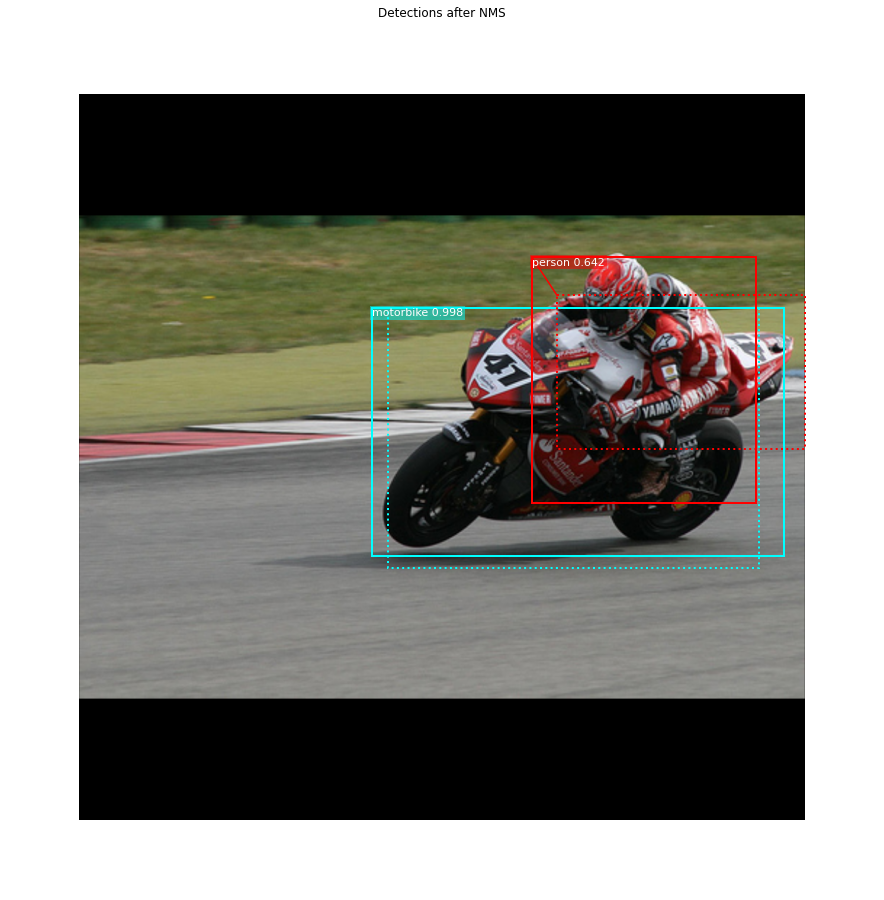

In [ ]:
# Show final detections
ixs = np.arange(len(keep))  # Display all
# ixs = np.random.randint(0, len(keep), 10)  # Display random sample
captions = ["{} {:.3f}".format(dataset.class_names[c], s) if c > 0 else ""
            for c, s in zip(roi_class_ids[keep][ixs], roi_scores[keep][ixs])]
visualize.draw_boxes(
    image, boxes=proposals[keep][ixs],
    refined_boxes=refined_proposals[keep][ixs],
    visibilities=np.where(roi_class_ids[keep][ixs] > 0, 1, 0),
    captions=captions, title="Detections after NMS",
    ax=get_ax())

## Stage 3: Generating Masks
This stage takes the detections (refined bounding boxes and class IDs) from the previous layer and runs the mask head to generate segmentation masks for every instance.
### 3.a Mask Targets
These are the training targets for the mask branch

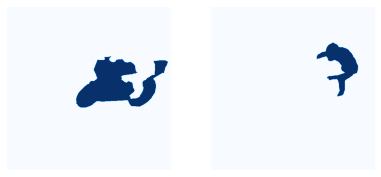

In [ ]:
display_images(np.transpose(gt_mask, [2, 0, 1]), cmap="Blues")

### 3.b Predicted Masks

In [ ]:
# Get predictions of mask head
mrcnn = model.run_graph([image], [
    ("detections", model.keras_model.get_layer("mrcnn_detection").output),
    ("masks", model.keras_model.get_layer("mrcnn_mask").output),
])

# Get detection class IDs. Trim zero padding.
det_class_ids = mrcnn['detections'][0, :, 4].astype(np.int32)
det_count = np.where(det_class_ids == 0)[0][0]
det_class_ids = det_class_ids[:det_count]

print("{} detections: {}".format(
    det_count, np.array(dataset.class_names)[det_class_ids]))

detections               shape: (1, 100, 6)           min:    0.00000  max:   15.00000  float32
masks                    shape: (1, 100, 28, 28, 21)  min:    0.00000  max:    0.99995  float32
2 detections: ['motorbike' 'person']


In [ ]:
# Masks
det_boxes = utils.denorm_boxes(mrcnn["detections"][0, :, :4], image.shape[:2])
det_mask_specific = np.array([mrcnn["masks"][0, i, :, :, c] 
                              for i, c in enumerate(det_class_ids)])
det_masks = np.array([utils.unmold_mask(m, det_boxes[i], image.shape)
                      for i, m in enumerate(det_mask_specific)])
log("det_mask_specific", det_mask_specific)
log("det_masks", det_masks)

det_mask_specific        shape: (2, 28, 28)           min:    0.00000  max:    0.99750  float32
det_masks                shape: (2, 1024, 1024)       min:    0.00000  max:    1.00000  bool


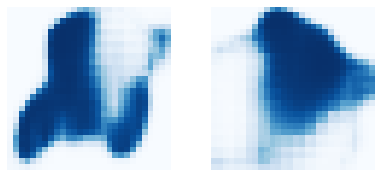

In [ ]:
display_images(det_mask_specific[:4] * 255, cmap="Blues", interpolation="none")

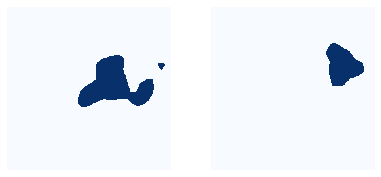

In [ ]:
display_images(det_masks[:4] * 255, cmap="Blues", interpolation="none")

## Visualize Activations
In some cases it helps to look at the output from different layers and visualize them to catch issues and odd patterns.

In [ ]:
# Get activations of a few sample layers
activations = model.run_graph([image], [
    ("input_image",        tf.identity(model.keras_model.get_layer("input_image").output)),
    ("res4w_out",          model.keras_model.get_layer("res4w_out").output),  # for resnet100
    ("rpn_bbox",           model.keras_model.get_layer("rpn_bbox").output),
    ("roi",                model.keras_model.get_layer("ROI").output),
])

input_image              shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10001  float32
res4w_out                shape: (1, 64, 64, 1024)     min:    0.00000  max:   63.37918  float32
rpn_bbox                 shape: (1, 261888, 4)        min:   -8.58855  max:  120.94328  float32
roi                      shape: (1, 1000, 4)          min:    0.00000  max:    1.00000  float32


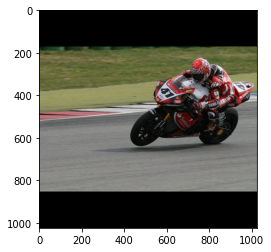

In [ ]:
# Input image (normalized)
_ = plt.imshow(modellib.unmold_image(activations["input_image"][0],config))

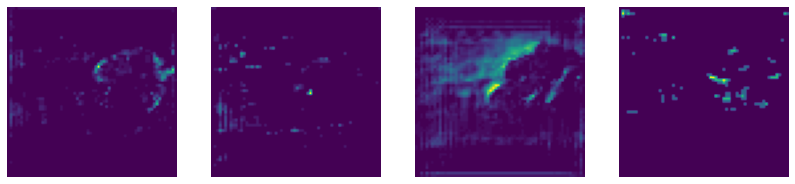

In [ ]:
# Backbone feature map
display_images(np.transpose(activations["res4w_out"][0,:,:,:4], [2, 0, 1]))

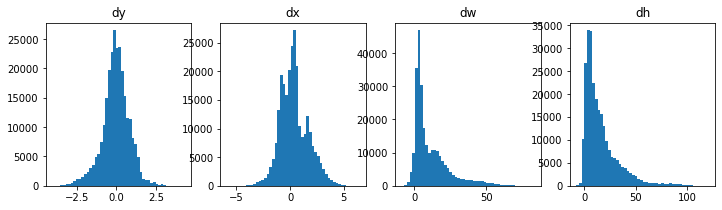

In [ ]:
# Histograms of RPN bounding box deltas
plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
plt.title("dy")
_ = plt.hist(activations["rpn_bbox"][0,:,0], 50)
plt.subplot(1, 4, 2)
plt.title("dx")
_ = plt.hist(activations["rpn_bbox"][0,:,1], 50)
plt.subplot(1, 4, 3)
plt.title("dw")
_ = plt.hist(activations["rpn_bbox"][0,:,2], 50)
plt.subplot(1, 4, 4)
plt.title("dh")
_ = plt.hist(activations["rpn_bbox"][0,:,3], 50)

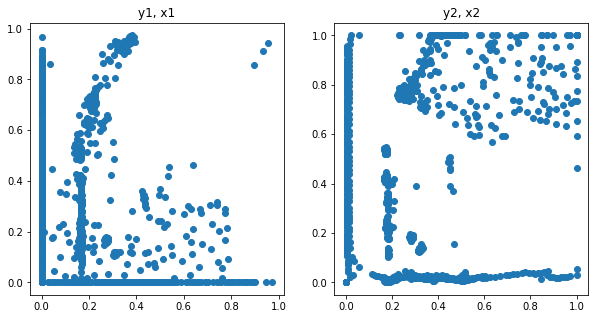

In [ ]:
# Distribution of y, x coordinates of generated proposals
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("y1, x1")
plt.scatter(activations["roi"][0,:,0], activations["roi"][0,:,1])
plt.subplot(1, 2, 2)
plt.title("y2, x2")
plt.scatter(activations["roi"][0,:,2], activations["roi"][0,:,3])
plt.show()

## Review Weight Stats

In [ ]:
# Show stats of all trainable weights    
visualize.display_weight_stats(model)

## Evaluate Model

Below code is based on user: mhtarora39 inputs on https://github.com/matterport/Mask_RCNN/issues/1839

In [ ]:
os.chdir(ROOT_DIR)
from mrcnn.utils import compute_ap
class EvalImage():
  def __init__(self,dataset,model,cfg):
    self.dataset = dataset
    self.model   = model
    self.cfg     = cfg

 
 
  def evaluate_model(self , len = 50):
    APs = list()
    precisions_dict = {}
    recall_dict     = {}
    for index,image_id in enumerate(self.dataset.image_ids):
      #if(index > len):
      #   break; 
      # load image, bounding boxes and masks for the image id
      image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(self.dataset, self.cfg,image_id, use_mini_mask=False)
      # convert pixel values (e.g. center)
      #scaled_image = modellib.mold_image(image, self.cfg)
      # convert image into one sample
      sample = np.expand_dims(image, 0)
     # print(len(image))
      # make prediction
      yhat = self.model.detect(sample, verbose=1)
      # extract results for first sample
      r = yhat[0]
      # calculate statistics, including AP
      AP, precisions, recalls, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
      precisions_dict[image_id] = np.mean(precisions)
      recall_dict[image_id] = np.mean(recalls)
      # store
      APs.append(AP)

    # calculate the mean AP across all images
    mAP = np.mean(APs)
    return mAP,precisions_dict,recall_dict

In [ ]:
eval = EvalImage(dataset_val,model,config)

In [ ]:
mAP, precisions_dict,recall_dict = eval.evaluate_model() 

Streaming output truncated to the last 5000 lines.
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 33)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 33)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1,

In [ ]:
mAP

0.7526347358820212

In [ ]:
from statistics import mean
#sum(d for d in precisions_dict) / len(precisions_dict)
mean(list(precisions_dict.values()))

0.5917704727005185

In [ ]:
mean(list(recall_dict.values()))

0.582322133457424

## Use Webcam of computer and use our model to create segment, boundig box and classification

Below code is based on an article on towardsDataScience: https://towardsdatascience.com/webcam-object-detection-with-mask-r-cnn-on-google-colab-b3b012053ed1

In [ ]:
class_names = dataset.class_names
class_names

['BG',
 'aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'potted plant',
 'sheep',
 'sofa',
 'train',
 'tv/monitor']

In [ ]:
'''
## Camera Capture
Using a webcam to capture images for processing on the runtime.
Source: https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=2viqYx97hPMi
'''

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      // show the video in the HTML element
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // prints the logs to cell
      let jsLog = function(abc) {
        document.querySelector("#output-area").appendChild(document.createTextNode(`${abc}... `));
      }

      // Wait for Capture to be clicked.
      // await new Promise((resolve) => capture.onclick = resolve);

      for (let i = 0; i < 5; i++) {
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        img = canvas.toDataURL('image/jpeg', quality);

        // show each captured image
        // let imgTag = document.createElement('img');
        // imgTag.src = img;
        // div.appendChild(imgTag);

        jsLog(i + "sending")
        // Call a python function and send this image
        google.colab.kernel.invokeFunction('notebook.run_algo', [img], {});
        jsLog(i + "SENT")

        // wait for X miliseconds second, before next capture
        await new Promise(resolve => setTimeout(resolve, 250));
      }

      stream.getVideoTracks()[0].stop(); // stop video stream
    }
    ''')
  display(js) # make the provided HTML, part of the cell
  data = eval_js('takePhoto({})'.format(quality)) # call the takePhoto() JavaScript function

In [ ]:
import IPython
from google.colab import output
from google.colab.patches import cv2_imshow

import time
import sys
import numpy as np
import cv2

from PIL import Image
from io import BytesIO
import base64
import logging

def data_uri_to_img(uri):
  """convert base64image to numpy array"""
  try:
    image = base64.b64decode(uri.split(',')[1], validate=True)
    # make the binary image, a PIL image
    image = Image.open(BytesIO(image))
    # convert to numpy array
    image = np.array(image, dtype=np.uint8); 
    return image
  except Exception as e:
    logging.exception(e);print('\n')
    return None

def run_algo(imgB64):
  """
  in Colab, run_algo function gets invoked by the JavaScript, that sends N images every second

  params:
    image: image
  """
  image = data_uri_to_img(imgB64)  
  if image is None:
    print("At run_algo(): image is None.")
    return

  try:
    # Run detection
    results = model.detect([image], verbose=1)
    # Visualize results
    r = results[0]
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

  except Exception as e:
    logging.exception(e)
    print('\n')

In [ ]:

# register this function, so JS code could call this
output.register_callback('notebook.run_algo', run_algo)

# put the JS code in cell and run it
take_photo()